# carat - microtiming patterns demo
<pre>
 _  _  __ _ _|_
(_ (_| | (_| |_   computer-aided rhythm analysis toolbox
</pre>

This notebook shows how to extract microtiming patterns from a recording using carat.

It is based on the tools proposed in: 

* *Microtiming in the rhythmic structure of candombe drumming patterns.* Jure, Rocamora. 4th International Conference on Analytical Approaches to World Music (AAWM), New York, USA. 2016. [AAWM2016](https://iie.fing.edu.uy/publicaciones/2016/JR16/)

**Note:** At this point it is assumed that there are beat and onset annotations for the recording.

The following steps shows how to:

* Load audio input from file
* Load beat annotations from file
* Load onset annotations from file
* Align beats to closest onsets
* Normalize onsets to the beat duration
* Assign onsets to positions in the metrical grid
* Compute the microtiming pattern of the onsets
* Compare two different microtiming patterns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import IPython.display as ipd

import carat

# Load audio and beat annotations
This first step loads the audio file and the corresponding beat/downbeat annotations from a text file.

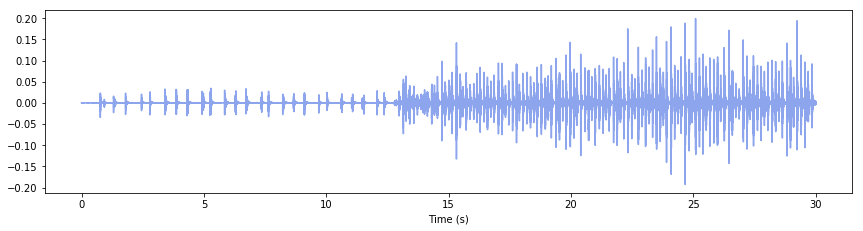

In [3]:
# use an example audio file provided
audio_path = carat.util.example_audio_file(num_file=2)

# load audio file (only 30 seconds)
y, sr = carat.audio.load(audio_path, duration=30.0)

# time corresponding to the audio signal
time = np.arange(0, y.size)/sr

plt.figure(figsize=(12,6))
ax1 = plt.subplot(211)
carat.display.wave_plot(y, sr, ax=ax1)
plt.tight_layout()

We can listen to the first 30 seconds of the audio file. 

**Note:** This is a separate track from a performance comprising three drums. The track corresponds to the **chico** drum, which is the timekeeper of the ensemble. The performance starts by playing the **clave** pattern (timeline pattern). After a few rhythmic cycles the **chico** drum starts playing an ostinato pattern that articulates the four subdivisions of the beat.

In [4]:
ipd.Audio(y, rate=sr)

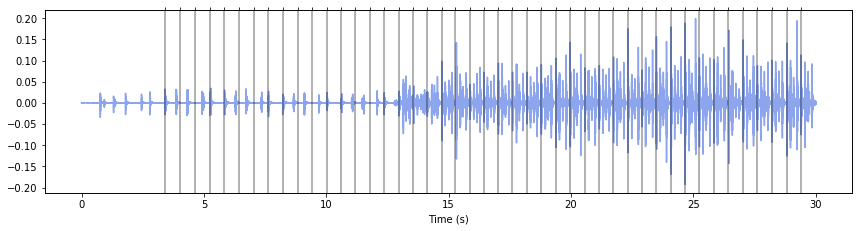

In [5]:
# use beat annotations provided for the example audio file
beat_annotations_path = carat.util.example_beats_file(num_file=2)

# load beats and beat labels
beats, beat_labs = carat.annotations.load_beats(beat_annotations_path)

# plot waveform and beats for the first 30 seconds
plt.figure(figsize=(12,6))
ax1 = plt.subplot(211)
carat.display.wave_plot(y, sr, ax=ax1, beats=beats)
plt.tight_layout()

# Load onsets and align beats to closest onsets
This second step loads the onsets from an annotations file. Then, beats are aligned to the closest onsets.

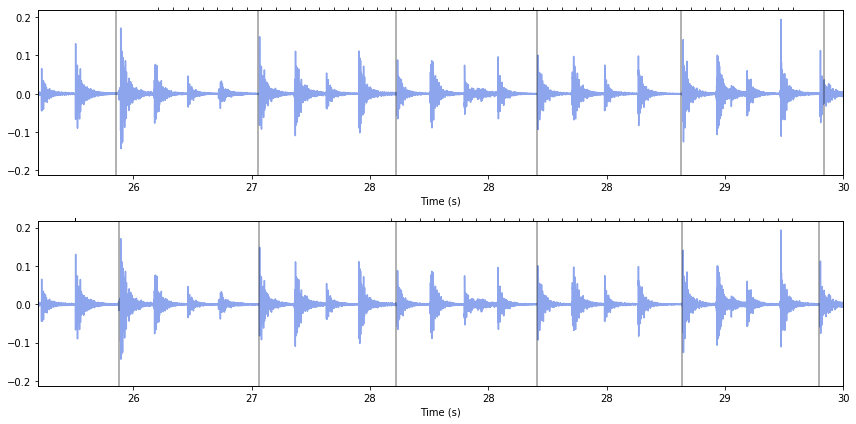

In [7]:
# use onset annotations provided for the example audio file
onset_annotations_file = carat.util.example_onsets_file(num_file=2)

# load onset annotations
onsets, _ = carat.annotations.load_onsets(onset_annotations_file)

# compute beats from onsets
beat_ons = carat.microtiming.beats_from_onsets(beats, onsets)


# plot waveform and beats
plt.figure(figsize=(12,6))
ax1 = plt.subplot(211)
carat.display.wave_plot(y, sr, ax=ax1, beats=beats)
# plot aligned beats
ax2 = plt.subplot(212, sharex=ax1)
carat.display.wave_plot(y, sr, ax=ax2, beats=beat_ons)
ax1.set_xlim([26.1, 29.5])
plt.tight_layout()

**Note:** The alignment is applied in order to use the onsets as the reference for defining the beat starting point. Note that the first and last beats of the plot are clearly better aligned to the onsets.

# Normalize onsets to the beat duration

Because of the variations in tempo that the recordings can exhibit, it is not possible to analyse timing data in absolute durations (e.g. in milliseconds). Therefore, it is necesary to normalize the durations, and in this case the beat duration is choosen as a reference. The onsets are then converted to their relative position with regards to the beats and are asigned to a position in an isochronous metrical grid (equally distributed subdivisions within the beat). The temporal reference for the beats that we consider is the estimation based on the closest onsets to the annotated beats, as previously computed. Anyway, in the following the two options are compared, i.e. normalizing with the annotated beats or with the beats aligned to the onsets.

In [9]:
# normalization of onsets to the annotated beats
ons1_norm = carat.microtiming.normalize_onsets(beats, onsets)
# normalization of onsets to the beats aligned to the onsets
ons2_norm = carat.microtiming.normalize_onsets(beat_ons, onsets)

# create default metrical grid (isochronous, 4 subdivisions)
metrical_grid = carat.microtiming.define_metrical_grid()

# assign onsets to metrical grid normalized according to annotated beats
ons1_in_grid = carat.microtiming.onsets_to_metrical_grid(ons1_norm, metrical_grid)
# assign onsets to metrical grid normalized according to the beats aligned to onsets
ons2_in_grid = carat.microtiming.onsets_to_metrical_grid(ons2_norm, metrical_grid)

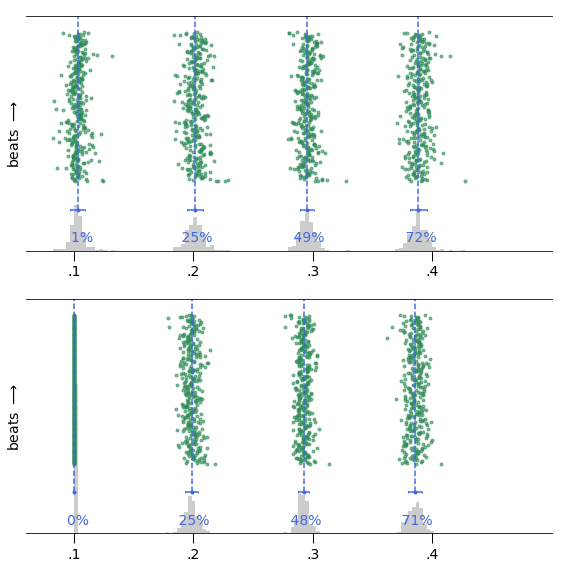

In [11]:
# plot the obtained microtiming patterns
plt.figure(figsize=(8,8))
ax1 = plt.subplot(211)
carat.display.onsets_in_grid_plot(ons1_in_grid[0], ax=ax1, hist_ons=True)
ax2 = plt.subplot(212)
carat.display.onsets_in_grid_plot(ons2_in_grid[0], ax=ax2, hist_ons=True)
plt.tight_layout()

**Note:** At the bottom of the figure an histogram of the onset locations is depicted. We fit a normal distribution to the onsets in each subdivision, and compute the mean and stdev values, which are shown in the figure. The mean values of the location of the subdivisions remains quite the same, but the stdev is clearly reduced when using the closest onset to the annotate beat as temporal reference. Interestingly enough, the third and fourth subdivisions are clearly ahead compared to an isochronous subdivision of the beat in four.

# Compare two different microtiming patterns

In the end, we compare the microtiming pattern of two timekeeper instruments from different music styles: the **chico** drum from a **candombe** recording, and the **tamborim** from a **samba enredo** recording. 

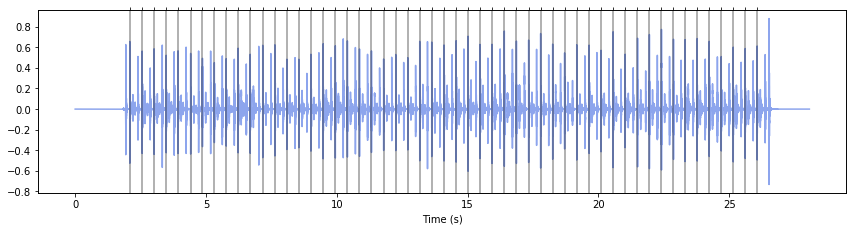

In [12]:
# use the example audio file of a taborim provided
audio_path = carat.util.example_audio_file(num_file=3)

# load audio file
y, sr = carat.audio.load(audio_path)

# time corresponding to the audio signal
time = np.arange(0, y.size)/sr

# beat annotations file
beat_annotations_path = carat.util.example_beats_file(num_file=3)

# load beats
beats, _ = carat.annotations.load_beats(beat_annotations_path, delimiter=' ')

# plot waveform and beats
plt.figure(figsize=(12,6))
ax1 = plt.subplot(211)
carat.display.wave_plot(y, sr, ax=ax1, beats=beats)
plt.tight_layout()

We can listen to the audio file.

In [13]:
ipd.Audio(y, rate=sr)

We repeat all the steps for the **tamborim** audio file.

In [15]:
# use onset annotations provided for the example audio file
onset_annotations_file = carat.util.example_onsets_file(num_file=3)

# load onset annotations
onsets, _ = carat.annotations.load_onsets(onset_annotations_file, delimiter=' ')

# compute beats from onsets
beat_ons = carat.microtiming.beats_from_onsets(beats, onsets)

# normalization of onsets to the annotated beats
ons3_norm = carat.microtiming.normalize_onsets(beat_ons, onsets)

# create default metrical grid (isochronous, 4 subdivisions)
metrical_grid = carat.microtiming.define_metrical_grid()

# assign onsets to metrical grid normalized according to the beats aligned to onsets
ons3_in_grid = carat.microtiming.onsets_to_metrical_grid(ons3_norm, metrical_grid)

We can now compare the microtiming patterns of each instrument.

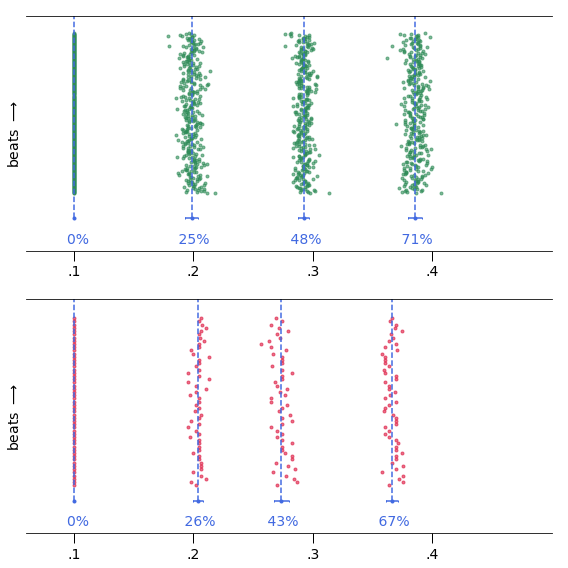

In [16]:
# plot the obtained microtiming patterns
plt.figure(figsize=(8,8))
ax1 = plt.subplot(211)
carat.display.onsets_in_grid_plot(ons2_in_grid[0], ax=ax1)
ax2 = plt.subplot(212)
carat.display.onsets_in_grid_plot(ons3_in_grid[0], ax=ax2, color='crimson')
plt.tight_layout()

**Note:** The microtiming pattern of the **tamborim** shows an even more drastic compresion of the location of onsets. Is worth noting that the fourth stroke of the instrument is closer to a division in three of the beat than to a division in four (66% compared to 75%).